In [1]:
# Name: Zita Lo
# Competition Number: 235642
# Date: December 11, 2025

# Purpose: Prepare an inspection dataset ready including engineer features required to evaluate and improve the current risk-scoring method.


In [2]:
# ------------------------------------------------------------------
# Import packages
# ------------------------------------------------------------------
import pandas as pd
import numpy as np

from collections import Counter
import re
from datetime import datetime
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import os
os.getcwd()

'C:\\Users\\zital\\Documents\\TOFU'

# Prepare Data

In [4]:
df = pd.read_csv("inspections_dataset\\inspections_dataset.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291538 entries, 0 to 291537
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID                     291538 non-null  int64 
 1   NAME                   291535 non-null  object
 2   AREA                   291538 non-null  object
 3   BUILDING               289460 non-null  object
 4   PHONE                  291532 non-null  object
 5   CUISINE DESCRIPTION    287571 non-null  object
 6   INSPECTION DATE        291538 non-null  object
 7   ACTION                 287571 non-null  object
 8   VIOLATION CODE         285290 non-null  object
 9   VIOLATION DESCRIPTION  285290 non-null  object
 10  CRITICAL FLAG          291538 non-null  object
 11  GRADE                  142293 non-null  object
 12  GRADE DATE             134931 non-null  object
 13  RECORD DATE            291538 non-null  object
 14  INSPECTION TYPE        287571 non-null  object
dtype

,ID,NAME,AREA,BUILDING,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50168829,Z-GRILL & PIZZERIA,TORONTO,803,2123151659,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,11/28/2025,NaN
1,50159261,FROZEN LOVE INC,TORONTO,122,9173256400,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,11/28/2025,NaN
2,50063280,ENZO'S OF ARTHUR AVE,NORTH YORK,NaN,7187334455,Italian,5/28/2025,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,NaN,NaN,11/28/2025,Cycle Inspection / Initial Inspection
3,50179242,OLIO E PIU,TORONTO,5,2122047111,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,11/28/2025,NaN
4,50168250,NEWLAB,RICHMOND HILL,63,8083992969,NaN,1/1/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,11/28/2025,NaN


In [5]:
# ------------------------------------------------------------------
# Clean column names by inserting '_' for space
# ------------------------------------------------------------------
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_')

In [6]:
# ------------------------------------------------------------------
# Fix Data Types - Convert ID to string
# ------------------------------------------------------------------
df['ID'] = df['ID'].astype(str)

# Convert date columns safely
df['INSPECTION_DATE'] = pd.to_datetime(df['INSPECTION_DATE'], errors='coerce')
df['RECORD_DATE']     = pd.to_datetime(df['RECORD_DATE'],     errors='coerce')
df['GRADE_DATE']      = pd.to_datetime(df['GRADE_DATE'],      errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291538 entries, 0 to 291537
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     291538 non-null  object        
 1   NAME                   291535 non-null  object        
 2   AREA                   291538 non-null  object        
 3   BUILDING               289460 non-null  object        
 4   PHONE                  291532 non-null  object        
 5   CUISINE_DESCRIPTION    287571 non-null  object        
 6   INSPECTION_DATE        291538 non-null  datetime64[ns]
 7   ACTION                 287571 non-null  object        
 8   VIOLATION_CODE         285290 non-null  object        
 9   VIOLATION_DESCRIPTION  285290 non-null  object        
 10  CRITICAL_FLAG          291538 non-null  object        
 11  GRADE                  142293 non-null  object        
 12  GRADE_DATE             134931 non-null  date

In [8]:
# Generate Profile Report on the DataFrame
# This part only has to generate it once 

profile = ProfileReport(df)
profile.to_file('Inspections Profiling Report1.html')

In [9]:
# ------------------------------------------------------------------
# Remove duplicate rows (exact matches)
# Logic: drop_duplicates() removes rows where all columns match. Expect 10 removals.
# ------------------------------------------------------------------
original_shape = df.shape
df = df.drop_duplicates()
print(f"Original shape: {original_shape}, After removing duplicates: {df.shape}")

Original shape: (291538, 15), After removing duplicates: (291528, 15)


In [10]:
# ------------------------------------------------------------------
# PHONE: Flag malformed
# ------------------------------------------------------------------
df['PHONE'] = df['PHONE'].str.replace(r'\D', '', regex=True)  # Remove non-digits
df['PHONE'] = np.where(df['PHONE'].str.len() == 10, df['PHONE'], np.nan)  # Null if not 10 digits

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
# --------------------------------------------------------------
# Establishments with NO inspection yet (INSPECTION_DATE = 1900-01-01)
# EXPLICITLY replace the exact 1900-01-01 date with NaT
# --------------------------------------------------------------
df['INSPECTION_DATE'] = df['INSPECTION_DATE'].replace(
    pd.Timestamp('1900-01-01'), pd.NaT
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# --------------------------------------------------------------
# Parse INSPECTION_DATE into new columns i.e. Year, Month, Day, Weekday; 
# Calculate count of days between inspection date and last upload date: DAYS_FROM_UPLOAD
# --------------------------------------------------------------
df['INSPECTION_YEAR']    = df['INSPECTION_DATE'].dt.year.astype('Int64')
df['INSPECTION_MONTH']   = df['INSPECTION_DATE'].dt.month.astype('Int64')
df['INSPECTION_DAY']     = df['INSPECTION_DATE'].dt.day.astype('Int64')
df['INSPECTION_WEEKDAY'] = df['INSPECTION_DATE'].dt.weekday.astype('Int64')  # 0 = Monday

latest_upload_date = df['RECORD_DATE'].max()

# Days from latest upload (NaT → very high number = high priority)
df['DAYS_SINCE_LAST'] = (latest_upload_date - df['INSPECTION_DATE']).dt.days.astype('Int64')
df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(9999)  # flag never-inspected as urgent

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [13]:
# ------------------------------------------------------------------
# Create Recency weight (3 for uninspected or overdue)
# ------------------------------------------------------------------
df['RECENCY_WEIGHT'] = np.where(
    df['DAYS_SINCE_LAST'] <= 365, 1, 3
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
# ------------------------------------------------------------------
# Impute "ACTION" based on INSPECTION_DATE
# ------------------------------------------------------------------
# Condition: If INSPECTION_DATE is NaT → "Not inspected yet."
df.loc[df['INSPECTION_DATE'].isna(), 'ACTION'] = "Not inspected yet."

# Optional: Fill any remaining NaN in ACTION (e.g., from data errors) with a placeholder
df['ACTION'] = df['ACTION'].fillna("No action recorded")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# ------------------------------------------------------------------
# Show before vs. after for verification
# ------------------------------------------------------------------
print("Imputation complete!")
print(f"Total rows: {len(df):,}")
print(f"Rows with 'Not inspected yet.': {len(df[df['ACTION'] == 'Not inspected yet.']):,}")
print(f"Unique ACTION values now:\n{df['ACTION'].value_counts().head(10)}")

print("\nSample of imputed records (never inspected):")
print(df[df['INSPECTION_DATE'].isna()][['ID', 'NAME', 'INSPECTION_DATE', 'ACTION']].head(10).to_string(index=False))

print("\nSample of inspected records (original ACTION preserved):")
print(df[df['INSPECTION_DATE'].notna()][['ID', 'NAME', 'INSPECTION_DATE', 'ACTION']].head(5).to_string(index=False))

Imputation complete!
Total rows: 291,528
Rows with 'Not inspected yet.': 3,967
Unique ACTION values now:
Violations were cited in the following area(s).                                                                                       271875
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.     10220
Not inspected yet.                                                                                                                      3967
No violations were recorded at the time of this inspection.                                                                             2259
Establishment re-opened by DOHMH.                                                                                                       1869
Establishment re-closed by DOHMH.                                                                                                       1338
Name: ACTION, dtype: int64

Sample of imputed rec

In [16]:
# ------------------------------------------------------------------
# Create VIOLATION_COUNT column
# - If ACTION is 'No violations...' or 'Not inspected yet.', set to 0 (ignore VIOLATION_CODE)
# - Else, 1 if VIOLATION_CODE not blank, else 0
# ------------------------------------------------------------------

df['ACTION'] = df['ACTION'].fillna('').str.strip().str.lower()
df['VIOLATION_COUNT'] = 0  # Default to 0

# Mask for no violations or not inspected
no_viol_mask = df['ACTION'].str.contains('no violations', na=False) | df['ACTION'].str.contains('not inspected yet', na=False)

# For other actions, set to 1 if VIOLATION_CODE not NaN/blank
other_mask = ~no_viol_mask
df.loc[other_mask, 'VIOLATION_COUNT'] = df.loc[other_mask, 'VIOLATION_CODE'].notna().astype(int)

print("Complete: VIOLATION_COUNT created")
print(df[['ID', 'INSPECTION_DATE', 'ACTION', 'VIOLATION_CODE', 'VIOLATION_COUNT']].head(10))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Complete: VIOLATION_COUNT created
         ID INSPECTION_DATE                                           ACTION  \
0  50168829             NaT                               not inspected yet.   
1  50159261             NaT                               not inspected yet.   
2  50063280      2025-05-28  violations were cited in the following area(s).   
3  50179242             NaT                               not inspected yet.   
4  50168250             NaT                               not inspected yet.   
5  41708524      2024-05-09  violations were cited in the following area(s).   
6  50075521      2020-03-05  violations were cited in the following area(s).   
7  41543970      2022-08-29  violations were cited in the following area(s).   
8  50172798             NaT                               not inspected yet.   
9  50177734             NaT                               not inspected yet.   

  VIOLATION_CODE  VIOLATION_COUNT  
0            NaN                0  
1            

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
# ------------------------------------------------------------------
# Cteate INSPECTION_RECENCY_COUNTER column
# Group by ID 
# Find unique inspection dates
# Sort descending (most recent first)
# Assign 1 to the most recent inspection, 2 to the second most recent, etc.
# Findings: Max recency counter (oldest inspection in history): 15
# Findings: Establishments with 3+ inspections: 17641
# ------------------------------------------------------------------

# Step 1: Create a temporary DataFrame with only valid inspection dates
valid_inspections = df.dropna(subset=['INSPECTION_DATE']).copy()

# Step 2: Keep only one row per ID + INSPECTION_DATE (to avoid duplicates)
# Keep the first occurrence 
unique_dates_per_id = valid_inspections.drop_duplicates(subset=['ID', 'INSPECTION_DATE'])

# Step 3: Sort by ID and INSPECTION_DATE descending (most recent first)
unique_dates_per_id = unique_dates_per_id.sort_values(
    ['ID', 'INSPECTION_DATE'], 
    ascending=[True, False]
)

# Step 4: Create the recency counter: 1 = most recent, 2 = second most recent, etc.
unique_dates_per_id['INSPECTION_RECENCY_COUNTER'] = unique_dates_per_id.groupby('ID').cumcount() + 1

# Step 5: Merge back to original df (only add the counter to rows with actual inspections)
df = df.merge(
    unique_dates_per_id[['ID', 'INSPECTION_DATE', 'INSPECTION_RECENCY_COUNTER']],
    on=['ID', 'INSPECTION_DATE'],
    how='left'
)

# Fill NaN (for uninspected or rows with NaT) with 0 or leave as NaN
df['INSPECTION_RECENCY_COUNTER'] = df['INSPECTION_RECENCY_COUNTER'].fillna(0).astype(int)

# Result
print("INSPECTION_RECENCY_COUNTER created successfully!")
print(df[['ID', 'NAME', 'INSPECTION_DATE', 'INSPECTION_RECENCY_COUNTER']].head(15).to_string(index=False))

# Summary
print(f"\nMax recency counter (oldest inspection in history): {df['INSPECTION_RECENCY_COUNTER'].max()}")
print(f"Establishments with 3+ inspections: { (df.groupby('ID')['INSPECTION_RECENCY_COUNTER'].max() >= 3).sum() }")

INSPECTION_RECENCY_COUNTER created successfully!
       ID                     NAME INSPECTION_DATE  INSPECTION_RECENCY_COUNTER
 50168829       Z-GRILL & PIZZERIA             NaT                           0
 50159261          FROZEN LOVE INC             NaT                           0
 50063280     ENZO'S OF ARTHUR AVE      2025-05-28                           4
 50179242               OLIO E PIU             NaT                           0
 50168250                   NEWLAB             NaT                           0
 41708524         REICHENBACH HALL      2024-05-09                           1
 50075521                 BEST 164      2020-03-05                           1
 41543970               PAUSE CAFE      2022-08-29                           6
 50172798             SKINNY LOUIE             NaT                           0
 50177734                  THE CAT             NaT                           0
 50176013    KINGS KITCHEN 58 INC.             NaT                           0
 50

In [18]:
# ------------------------------------------------------------------
# Cteate IS_RECENT_TWO_INSPECTIONS column
# True if INSPECTION_RECENCY_COUNTER is 1 or 2 (i.e., the two most recent inspections)
# False otherwise (including 0 for uninspected)
# Findings: Summary: Rows from the two most recent inspections: 159,099
# Total rows: 291,528. Percentage from recent two inspections: 54.6%
# ------------------------------------------------------------------
# Add the boolean column: True for the two most recent inspections
df['IS_RECENT_TWO_INSPECTIONS'] = df['INSPECTION_RECENCY_COUNTER'].isin([1, 2])

# Convert to proper boolean (optional, already True/False)
df['IS_RECENT_TWO_INSPECTIONS'] = df['IS_RECENT_TWO_INSPECTIONS'].astype(bool)

print("IS_RECENT_TWO_INSPECTIONS column added successfully!")
print(df[['ID', 'NAME', 'INSPECTION_DATE', 'INSPECTION_RECENCY_COUNTER', 'IS_RECENT_TWO_INSPECTIONS']].head(15).to_string(index=False))

# Quick summary
print("\nSummary:")
print(f"Rows from the two most recent inspections: {df['IS_RECENT_TWO_INSPECTIONS'].sum():,}")
print(f"Total rows: {len(df):,}")
print(f"Percentage from recent two inspections: {df['IS_RECENT_TWO_INSPECTIONS'].mean()*100:.1f}%")

IS_RECENT_TWO_INSPECTIONS column added successfully!
       ID                     NAME INSPECTION_DATE  INSPECTION_RECENCY_COUNTER  IS_RECENT_TWO_INSPECTIONS
 50168829       Z-GRILL & PIZZERIA             NaT                           0                      False
 50159261          FROZEN LOVE INC             NaT                           0                      False
 50063280     ENZO'S OF ARTHUR AVE      2025-05-28                           4                      False
 50179242               OLIO E PIU             NaT                           0                      False
 50168250                   NEWLAB             NaT                           0                      False
 41708524         REICHENBACH HALL      2024-05-09                           1                       True
 50075521                 BEST 164      2020-03-05                           1                       True
 41543970               PAUSE CAFE      2022-08-29                           6                     

In [19]:
# ------------------------------------------------------------------
# Split INSPECTION_TYPE into two clean columns
# Example: "Cycle Inspection / Initial Inspection" → 
#          "INSPECTION_PROGRAM" = "Cycle Inspection"
#          "INSPECTION_SUBTYPE" = "Initial Inspection"
# ------------------------------------------------------------------
# Replace 'nan' strings from pandas with actual NaN
df['INSPECTION_TYPE'] = df['INSPECTION_TYPE'].replace('nan', pd.NA)

# Split on " / " (note the spaces around the slash — this is how it's formatted in your data)
split_cols = df['INSPECTION_TYPE'].str.split(' / ', n=1, expand=True)

# Assign to two new columns (handle cases with no '/' → only one part)
df['INSPECTION_PROGRAM'] = split_cols[0].str.strip() if split_cols.shape[1] > 0 else pd.NA
df['INSPECTION_SUBTYPE'] = split_cols[1].str.strip() if split_cols.shape[1] > 1 else pd.NA

# Optional: Fill missing subtype with 'Not Specified' or leave as NaN
df['INSPECTION_PROGRAM'] = df['INSPECTION_PROGRAM'].fillna('Not Specified')
df['INSPECTION_SUBTYPE'] = df['INSPECTION_SUBTYPE'].fillna('Not Specified')

In [20]:
# ------------------------------------------------------------------
# Handle Missing Values
# Clean AREA: Replace 'MISSING' with NaN, count missing, impute from phone area code
# Logic: Data uses 'MISSING' string. Extract first 3 digits of PHONE. Map approximately (data phones are NYC-mixed).
# ------------------------------------------------------------------
df['AREA'] = df['AREA'].str.upper().str.strip().replace('MISSING', np.nan)
print(f"AREA value counts before imputation:\n{df['AREA'].value_counts(dropna=False)}")

AREA value counts before imputation:
TORONTO          107976
RICHMOND HILL     74790
ETOBICOKE         71996
NORTH YORK        26750
SCARBOROUGH       10000
NaN                  16
Name: AREA, dtype: int64


In [21]:
missing_area = df['AREA'].isna().sum()
print(f"Missing AREA: {missing_area}")  # Should be 16

# Extract phone area code (first 3 digits)
df['PHONE_AREA_CODE'] = df['PHONE'].astype(str).str[:3]

# Filter only non-missing AREA
valid_df = df[df['AREA'].notna() & (df['AREA'] != 'MISSING')]

# Group by PHONE_AREA_CODE and find the most common AREA for each
mapping = valid_df.groupby('PHONE_AREA_CODE')['AREA'].agg(lambda x: x.mode()[0] if not x.empty else None).dropna()

# Convert to dict
mapping_dict = mapping.to_dict()


Missing AREA: 16


In [22]:
# Now export to CSV
mapping_df = pd.DataFrame(list(mapping_dict.items()), columns=['PHONE_AREA_CODE', 'IMPUTED_AREA'])

# Sort by area code for readability
mapping_df = mapping_df.sort_values('PHONE_AREA_CODE')

# Export to CSV
mapping_df.to_csv('phone_area_code_to_AREA_mapping.csv', index=False)

print("Mapping successfully exported to 'phone_area_code_to_AREA_mapping.csv'")
print(f"Total mappings: {len(mapping_df)}")
print("\nFirst 10 rows:")
print(mapping_df.head(10))

Mapping successfully exported to 'phone_area_code_to_AREA_mapping.csv'
Total mappings: 282

First 10 rows:
  PHONE_AREA_CODE   IMPUTED_AREA
0             000     NORTH YORK
1             014        TORONTO
2             031        TORONTO
3             111        TORONTO
4             131      ETOBICOKE
5             134      ETOBICOKE
6             161  RICHMOND HILL
7             163  RICHMOND HILL
8             164        TORONTO
9             171  RICHMOND HILL


In [23]:
# Create BEFORE view (only the 16 records)
missing_area_df = df[df['AREA'].isna()].copy()
before = missing_area_df[['ID', 'NAME', 'AREA', 'PHONE', 'PHONE_AREA_CODE']].copy()
before['AREA_AFTER'] = before['PHONE_AREA_CODE'].map(mapping_dict)  # preview
before.rename(columns={'AREA': 'AREA_BEFORE'}, inplace=True)

In [24]:
# Apply imputation to the original df (only for missing AREA)
df.loc[df['AREA'].isna(), 'AREA'] = df.loc[df['AREA'].isna(), 'PHONE_AREA_CODE'].map(mapping_dict)

# Create AFTER view
after = df.loc[before.index, ['ID', 'NAME', 'AREA', 'PHONE', 'PHONE_AREA_CODE']].copy()
after.rename(columns={'AREA': 'AREA_AFTER'}, inplace=True)

In [25]:
# Combine BEFORE and AFTER for comparison
comparison = before[['ID', 'NAME', 'AREA_BEFORE', 'PHONE', 'PHONE_AREA_CODE']].merge(
    after[['ID', 'AREA_AFTER']],
    on='ID',
    how='left'
)

# Reorder and clean up
comparison = comparison[['ID', 'NAME', 'PHONE', 'PHONE_AREA_CODE', 'AREA_BEFORE', 'AREA_AFTER']]
comparison = comparison.sort_values('NAME').reset_index(drop=True)

# Final display
print("\n" + "="*80)
print("           BEFORE AND AFTER IMPUTATION (16 RECORDS)")
print("="*80)
print(comparison.to_string(index=False))

# Summary
print("\n" + "-"*50)
print(f"Successfully imputed: {comparison['AREA_AFTER'].notna().sum()}/16")
print(f"Still missing after imputation: {comparison['AREA_AFTER'].isna().sum()}")
if comparison['AREA_AFTER'].isna().any():
    print("Unmapped phone codes:")
    print(comparison[comparison['AREA_AFTER'].isna()][['PHONE', 'PHONE_AREA_CODE']])


           BEFORE AND AFTER IMPUTATION (16 RECORDS)
       ID                                    NAME       PHONE PHONE_AREA_CODE AREA_BEFORE     AREA_AFTER
 50177932                      BUTTERMEE PANCAKES  3479335670             347         NaN  RICHMOND HILL
 50162584                           COZY TEA LOFT  3472619435             347         NaN  RICHMOND HILL
 50128762                 DELICIAS EXPRESS II LLC  5166036827             516         NaN      ETOBICOKE
 50168965                           Dadi's Kababs  9146027098             914         NaN        TORONTO
 50154476                    EDEN VALLEY GOLF LLC  6476321088             647         NaN  RICHMOND HILL
 50123437                FRESH STOP JUICE BAR INC  9176809065             917         NaN        TORONTO
 50169864                   JFK PRIMECLASS LOUNGE  7043286780             704         NaN        TORONTO
 50127295                          JIXIANG 99 LLC  6312649122             631         NaN        TORONTO
 5

In [26]:
# Identify rows where NAME is blank/missing
# This catches: NaN, empty string '', whitespace only, or 'nan' as string
blank_mask = (
    df['NAME'].isna() |
    (df['NAME'].astype(str).str.strip() == '') |
    (df['NAME'].astype(str).str.strip().str.lower() == 'nan')
)

blank_count = blank_mask.sum()
print(f"Found {blank_count} records with blank/missing NAME")

# Step 2: Generate sequential numbers: MissingName_1, MissingName_2, ...
missing_names = [f"MissingName_{i}" for i in range(1, blank_count + 1)]

# Step 3: Fill only the blank ones with the new names
df.loc[blank_mask, 'NAME'] = missing_names

# Optional: Create a clean version just in case
df['NAME'] = df['NAME'].astype(str)

print(f"Successfully filled {blank_count} missing NAMEs with MissingName_1 to MissingName_{blank_count}")
print("\nSample of filled records:")
print(df[blank_mask][['ID', 'NAME']].head(10).to_string(index=False))

# Final check
print(f"\nRemaining blank NAMEs: {(df['NAME'].astype(str).str.strip() == '').sum()}")

Found 3 records with blank/missing NAME
Successfully filled 3 missing NAMEs with MissingName_1 to MissingName_3

Sample of filled records:
       ID           NAME
 50169969  MissingName_1
 50174985  MissingName_2
 50173537  MissingName_3

Remaining blank NAMEs: 0


In [27]:
# ------------------------------------------------------------------
# Identify franchises = any NAME that has more than one unique ID (location)
# Flag each establishment as Franchise or Independent
# Create a unique franchise ID that combines:
# NAME + total number of locations in the chain + ID → e.g., DUNKIN_12_ID, SUBWAY_8_ID

# For risk modeling: franchises often have standardized operations → lower risk per location, or higher visibility → higher scrutiny.
# ------------------------------------------------------------------

df['NAME'] = df['NAME'].str.strip().str.upper()

# ------------------------------------------------------------------
# Step 1: Count how many unique IDs (locations) each NAME has
# ------------------------------------------------------------------
FRANCHISE_COUNTS = df.groupby('NAME')['ID'].nunique().reset_index()
FRANCHISE_COUNTS.columns = ['NAME', 'FRANCHISE_LOCATION_COUNT']

# Flag as franchise if more than 1 location
FRANCHISE_COUNTS['IS_FRANCHISE'] = FRANCHISE_COUNTS['FRANCHISE_LOCATION_COUNT'] > 1

In [28]:
# ------------------------------------------------------------------
# Step 2 Create FRANCHISE_ID as "NAME_COUNT_ID" and merge back with original IDs
# ------------------------------------------------------------------
FRANCHISE_COUNTS['FRANCHISE_ID'] = FRANCHISE_COUNTS.apply(
    lambda row: f"{row['NAME']}_{row['FRANCHISE_LOCATION_COUNT']}", axis=1
)

# Merge the franchise metadata back to the main dataframe (one row per original record)
df = df.merge(
    FRANCHISE_COUNTS[['NAME', 'FRANCHISE_LOCATION_COUNT', 'IS_FRANCHISE', 'FRANCHISE_ID']],
    on='NAME',
    how='left'
)

df['FRANCHISE_ID']= df['FRANCHISE_ID'] + '_' + df['ID']


In [29]:
df.head(50)

,ID,NAME,AREA,BUILDING,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,VIOLATION_CODE,VIOLATION_DESCRIPTION,...,RECENCY_WEIGHT,VIOLATION_COUNT,INSPECTION_RECENCY_COUNTER,IS_RECENT_TWO_INSPECTIONS,INSPECTION_PROGRAM,INSPECTION_SUBTYPE,PHONE_AREA_CODE,FRANCHISE_LOCATION_COUNT,IS_FRANCHISE,FRANCHISE_ID
0,50168829,Z-GRILL & PIZZERIA,TORONTO,803,2123151659,NaN,NaT,not inspected yet.,NaN,NaN,...,3,0,0,False,Not Specified,Not Specified,212,1,False,Z-GRILL & PIZZERIA_1_50168829
1,50159261,FROZEN LOVE INC,TORONTO,122,9173256400,NaN,NaT,not inspected yet.,NaN,NaN,...,3,0,0,False,Not Specified,Not Specified,917,1,False,FROZEN LOVE INC_1_50159261
2,50063280,ENZO'S OF ARTHUR AVE,NORTH YORK,NaN,7187334455,Italian,2025-05-28,violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,...,1,1,4,False,Cycle Inspection,Initial Inspection,718,1,False,ENZO'S OF ARTHUR AVE_1_50063280
3,50179242,OLIO E PIU,TORONTO,5,2122047111,NaN,NaT,not inspected yet.,NaN,NaN,...,3,0,0,False,Not Specified,Not Specified,212,2,True,OLIO E PIU_2_50179242
4,50168250,NEWLAB,RICHMOND HILL,63,8083992969,NaN,NaT,not inspected yet.,NaN,NaN,...,3,0,0,False,Not Specified,Not Specified,808,1,False,NEWLAB_1_50168250
5,41708524,REICHENBACH HALL,TORONTO,5,2123027744,German,2024-05-09,violations were cited in the following area(s).,09B,Thawing procedure improper.,...,3,1,1,True,Cycle Inspection,Re-inspection,212,1,False,REICHENBACH HALL_1_41708524
6,50075521,BEST 164,ETOBICOKE,36-11,3473684488,Korean,2020-03-05,violations were cited in the following area(s).,15F1,Ashtrays in smoke-free area,...,3,1,1,True,Smoke-Free Air Act,Initial Inspection,347,1,False,BEST 164_1_50075521
7,41543970,PAUSE CAFE,TORONTO,3,2126775415,Middle Eastern,2022-08-29,violations were cited in the following area(s).,04A,Food Protection Certificate (FPC) not held by ...,...,3,1,6,False,Cycle Inspection,Initial Inspection,212,1,False,PAUSE CAFE_1_41543970
8,50172798,SKINNY LOUIE,TORONTO,1145,7866821339,NaN,NaT,not inspected yet.,NaN,NaN,...,3,0,0,False,Not Specified,Not Specified,786,1,False,SKINNY LOUIE_1_50172798
9,50177734,THE CAT,RICHMOND HILL,1238,9175687119,NaN,NaT,not inspected yet.,NaN,NaN,...,3,0,0,False,Not Specified,Not Specified,917,1,False,THE CAT_1_50177734


In [30]:
print(df.shape)
print(df.info())

(291528, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 291528 entries, 0 to 291527
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ID                          291528 non-null  object        
 1   NAME                        291528 non-null  object        
 2   AREA                        291528 non-null  object        
 3   BUILDING                    289450 non-null  object        
 4   PHONE                       291239 non-null  object        
 5   CUISINE_DESCRIPTION         287561 non-null  object        
 6   INSPECTION_DATE             287561 non-null  datetime64[ns]
 7   ACTION                      291528 non-null  object        
 8   VIOLATION_CODE              285280 non-null  object        
 9   VIOLATION_DESCRIPTION       285280 non-null  object        
 10  CRITICAL_FLAG               291528 non-null  object        
 11  GRADE                     

In [31]:
# ------------------------------------------------------------------
# Resolve Consistency Issues:
# Violation mappings: Standardize VIOLATION DESCRIPTION per VIOLATION CODE using mode
# Forces every violation code to use its most common wording
# ------------------------------------------------------------------
# Keep a copy of the ORIGINAL description
df['VIOLATION_DESCRIPTION_ORIGINAL'] = df['VIOLATION_DESCRIPTION'].copy()

# ------------------------------------------------------------------
# 1. Find the most common (mode) description for each VIOLATION_CODE
# ------------------------------------------------------------------
desc_map = (
    df.groupby('VIOLATION_CODE')['VIOLATION_DESCRIPTION']
      .agg(lambda x: pd.Series.mode(x)[0] if len(pd.Series.mode(x)) > 0 else x.iloc[0] if not x.empty else None)
      .to_dict()
)

# ------------------------------------------------------------------
# 2. Apply standardization
# ------------------------------------------------------------------
df['VIOLATION_DESCRIPTION_CLEAN'] = df['VIOLATION_CODE'].map(desc_map)

# ------------------------------------------------------------------
# 3. Find only the rows where something actually changed
# ------------------------------------------------------------------
changed = df[
    (df['VIOLATION_DESCRIPTION_ORIGINAL'].notna()) &
    (df['VIOLATION_DESCRIPTION_CLEAN'].notna()) &
    (df['VIOLATION_DESCRIPTION_ORIGINAL'] != df['VIOLATION_DESCRIPTION_CLEAN'])
].copy()

# Clean up display
changed = changed[['VIOLATION_CODE', 'VIOLATION_DESCRIPTION_ORIGINAL', 'VIOLATION_DESCRIPTION_CLEAN']].drop_duplicates()

print(f"Found {len(changed)} violation descriptions that were standardized")
print("="*120)
print("BEFORE → AFTER (only changed ones)")
print("="*120)
print(changed.to_string(index=False))

Found 81 violation descriptions that were standardized
BEFORE → AFTER (only changed ones)
VIOLATION_CODE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [32]:
# Replace the original column with the clean one
df['VIOLATION_DESCRIPTION'] = df['VIOLATION_DESCRIPTION_CLEAN']

# Drop helper columns
df = df.drop(columns=['VIOLATION_DESCRIPTION_ORIGINAL', 'VIOLATION_DESCRIPTION_CLEAN'])

print("VIOLATION_DESCRIPTION is now consistent and clean!")

VIOLATION_DESCRIPTION is now consistent and clean!


# Handling Missing Values in "GRADE"

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Heatmap (Including GRADE_NUM)')

Correlation heatmap saved as 'correlation_heatmap.jpg'


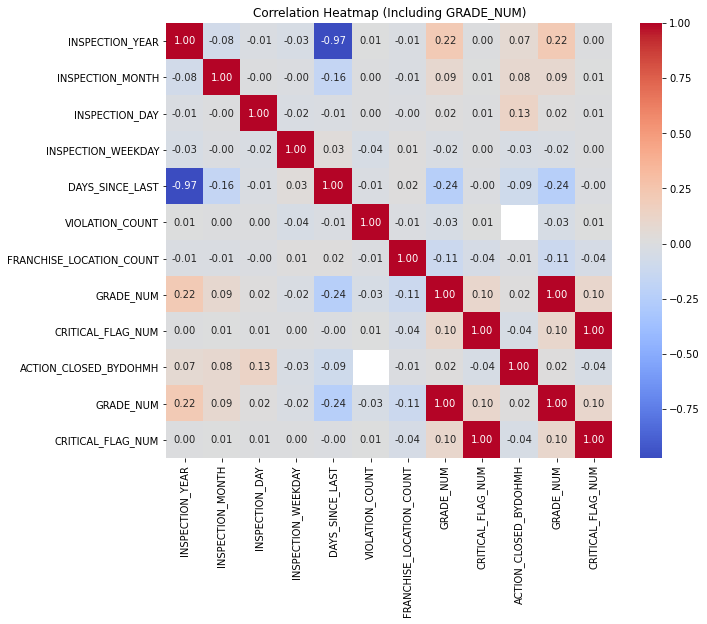

Correlations with GRADE_NUM:
                          GRADE_NUM  GRADE_NUM
INSPECTION_YEAR            0.218418   0.218418
INSPECTION_MONTH           0.088011   0.088011
INSPECTION_DAY             0.017141   0.017141
INSPECTION_WEEKDAY        -0.016473  -0.016473
DAYS_SINCE_LAST           -0.237477  -0.237477
VIOLATION_COUNT           -0.033667  -0.033667
FRANCHISE_LOCATION_COUNT  -0.114533  -0.114533
GRADE_NUM                  1.000000   1.000000
CRITICAL_FLAG_NUM          0.102200   0.102200
ACTION_CLOSED_BYDOHMH      0.016443   0.016443
GRADE_NUM                  1.000000   1.000000
CRITICAL_FLAG_NUM          0.102200   0.102200
<class 'pandas.core.frame.DataFrame'>
Int64Index: 291528 entries, 0 to 291527
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ID                          291528 non-null  object        
 1   NAME                        291528 non-null  obje

In [33]:
# GRADE:  Missing values (51.2% 	149245records) in the entire data
# Some missing ones are tied to uninspected establishments (NaT dates)3967 records or no violations (1818 records).
# Checking if imputation is feasible using correlated columns.
# FINDINGS: From data: GRADE_NUM correlates weakly with CRITICAL_FLAG_NUM (0.10)—suggesting critical violations predict worse grades. 
# Other correlations are near zero, so imputation from CRITICAL_FLAG is not strong. Better drop).

# Step 1: Check Correlations (to Decide Impute vs. Drop)

# From above df
grade_map = {'A': 0, 'B': 1, 'C': 2, 'N': 3, 'Z': 4, 'P': 5}
df['GRADE_NUM'] = df['GRADE'].map(grade_map)


# Map other categoricals to numeric
df['CRITICAL_FLAG_NUM'] = df['CRITICAL_FLAG'].map({'Critical': 1, 'Not Critical': 0, 'Not Applicable': np.nan})

df['ACTION_CLOSED_BYDOHMH'] = df['ACTION'].map({'establishment closed by dohmh. violations were cited in the following area(s) and those requiring immediate action were addressed.': 1, 'establishment re-closed by dohmh.': 2})

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist() + ['GRADE_NUM', 'CRITICAL_FLAG_NUM']
corr_df = df[numeric_cols].dropna(subset=['GRADE_NUM'])  # Drop rows missing GRADE for corr

# Correlation matrix
corr_matrix = corr_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Including GRADE_NUM)')

# Export to png
plt.savefig('correlation_heatmap.png', 
            format='png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')

print("Correlation heatmap saved as 'correlation_heatmap.jpg'")

plt.show()

# Focus on GRADE_NUM correlations
print("Correlations with GRADE_NUM:")
print(corr_matrix['GRADE_NUM'])

df['GRADE_NUM'] = df['GRADE_NUM'].astype('Int64')
df['CRITICAL_FLAG_NUM'] = df['CRITICAL_FLAG_NUM'].astype('Int64')
df['ACTION_CLOSED_BYDOHMH'] = df['ACTION_CLOSED_BYDOHMH'].astype('Int64')

df.info()


In [34]:
df.to_csv("df_establishment_inspections.csv", index=False)

# Generate a copy of establishment details only (unique_df)

In [35]:
# Create unique df: one record per ID, taking 'first' for details
unique_df = df.drop_duplicates(subset='ID', keep='first')

# Select only the requested columns
requested_columns = [
     'FRANCHISE_ID', 'ID', 'NAME', 'AREA','BUILDING', 'PHONE', 'CUISINE_DESCRIPTION',
    'PHONE_AREA_CODE', 'FRANCHISE_LOCATION_COUNT',  'IS_FRANCHISE'
]

unique_df = unique_df[requested_columns]

# SORT BY: FRANCHISE_ID → AREA → ID (all ascending)
unique_df = unique_df.sort_values(
    by=['FRANCHISE_ID', 'AREA', 'ID'],
    ascending=[True, True, True]
).reset_index(drop=True)

# Print first 10 rows
print("First 10 rows of the new unique_df (sorted by FRANCHISE_ID → AREA → ID):")
print(unique_df.head(10).to_string(index=False))

# Export to CSV
unique_df.to_csv('unique_establishment_details.csv', index=False)
print("\nExported to 'unique_establishment_details.csv'")

First 10 rows of the new unique_df (sorted by FRANCHISE_ID → AREA → ID):
                            FRANCHISE_ID        ID                          NAME           AREA BUILDING       PHONE CUISINE_DESCRIPTION PHONE_AREA_CODE  FRANCHISE_LOCATION_COUNT  IS_FRANCHISE
    "U" LIKE CHINESE TAKE OUT_1_50126747  50126747     "U" LIKE CHINESE TAKE OUT        TORONTO     4926  2129426668             Chinese             212                         1         False
 #1 GARDEN CHINESE RESTAURANT_1_50075009  50075009  #1 GARDEN CHINESE RESTAURANT  RICHMOND HILL      221  9172508950             Chinese             917                         1         False
   #1 SABOR LATINO RESTAURANT_1_41336841  41336841    #1 SABOR LATINO RESTAURANT     NORTH YORK     4120  7186532222      Latin American             718                         1         False
                     $1 PIZZA_2_50086385  50086385                      $1 PIZZA        TORONTO      832  9175878888               Pizza             917   

# Generate risk keys based on VIOLATION DESCRIPTION

In [36]:
# ------------------------------------------------------------------
# Extract High-Value Signals from VIOLATION_DESCRIPTION
# ------------------------------------------------------------------

df['VIOLATION_DESCRIPTION'] = df['VIOLATION_DESCRIPTION'].fillna('').str.lower()

# 1. To generate the high_risk_keywords, get the most frequent violation codes first (these are the real hot spots)
top_codes = df['VIOLATION_CODE'].value_counts().head(50).index

# 2. Show their actual descriptions → this is where the keywords come from
print("Top 50 most frequent violation codes and their descriptions:")
for code in top_codes:
    samples = df[df['VIOLATION_CODE']==code]['VIOLATION_DESCRIPTION'].unique()[:2]
    print(f"{code:>6}: {samples[0] if len(samples)>0 else ''}")



Top 50 most frequent violation codes and their descriptions:
   10F: non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.
   08A: establishment is not free of harborage or conditions conducive to rodents, insects or other pests.
   06D: food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.
   02G: cold tcs food item held above 41 °f; smoked or processed fish held above 38 °f; intact raw eggs held above 45 °f; or reduced oxygen packaged (rop) tcs foods held above required temperatures except during active necessary preparation.
   10B: anti-siphonage or back-flow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly. condensation or liquid was

In [37]:
# ------------------------------------------------------------------
# Extract High-Value Signals from VIOLATION_DESCRIPTION
# ------------------------------------------------------------------

# Focus only on rows that actually have a violation
violations = df[df['VIOLATION_DESCRIPTION'].notna()].copy()

# Clean description for consistent counting
violations['VIOLATION_DESCRIPTION_CLEAN'] = violations['VIOLATION_DESCRIPTION'].str.strip()

# ------------------------------------------------------------------
# Count how many times each exact description appears
# ------------------------------------------------------------------
desc_counts = violations['VIOLATION_DESCRIPTION_CLEAN'].value_counts()

# ------------------------------------------------------------------
# Find the median count
# ------------------------------------------------------------------
median_count = desc_counts.median()
print(f"Total unique violation descriptions: {len(desc_counts)}")
print(f"Median occurrence count: {median_count:.0f}")

# ------------------------------------------------------------------
# Keep only descriptions that appear MORE than the median
# ------------------------------------------------------------------
above_median = desc_counts[desc_counts > median_count]

print(f"\n{len(above_median)} violation descriptions appear more than {median_count:.0f} times (above median):")
print("="*130)

# Show them nicely sorted by frequency
result = above_median.sort_values(ascending=False).reset_index()
result.columns = ['VIOLATION_DESCRIPTION', 'COUNT']
print(result.to_string(index=False))

# ------------------------------------------------------------------
# Show associated VIOLATION_CODE (most common one)
# ------------------------------------------------------------------
print("\n" + "="*130)
print("WITH MOST COMMON VIOLATION CODE:")
print("="*130)

# For each high-frequency description, show the most common code
top_desc_with_code = []
for desc in above_median.index:
    code = violations[violations['VIOLATION_DESCRIPTION_CLEAN'] == desc]['VIOLATION_CODE'].mode()
    code_str = code.iloc[0] if len(code) > 0 else "—"
    top_desc_with_code.append({
        'VIOLATION_DESCRIPTION': desc,
        'COUNT': above_median[desc],
        'MOST_COMMON_CODE': code_str
    })

final = pd.DataFrame(top_desc_with_code).sort_values('COUNT', ascending=False)
print(final.to_string(index=False))

Total unique violation descriptions: 147
Median occurrence count: 112

73 violation descriptions appear more than 112 times (above median):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    VIOLATION_DESCRIPTION  COUNT MOST_COMMON_CODE
                      

In [38]:
# All high-frequency violation descriptions (lowercased)
high_freq_text = final.to_string(index=False)

# Extract meaningful keywords (2–4 grams, excluding stop words)
words = re.findall(r'\b(?:mice|mouse|rats|rat|roaches|roach|flies|fly|pest|pesticide|toxic|chemical|140|41|tcs|temperature|hand.?washing|handwashing|bare hand|cross.?-?contamination|raw|filth|sewage|soiled|wiping cloth|sanitz|unclean|hair restraint|jewelry|nail|allergen|cannabis|marijuana|rop|canned|swollen|leaking|rusted)\b', high_freq_text.lower())

# Count and take the most representative ones
top_keywords = Counter(words).most_common()

In [39]:
print(top_keywords)

[('tcs', 10), ('flies', 10), ('temperature', 7), ('raw', 6), ('rop', 4), ('sewage', 4), ('hand washing', 4), ('41', 3), ('140', 3), ('pesticide', 3), ('mice', 2), ('toxic', 2), ('chemical', 2), ('rats', 2), ('pest', 2), ('canned', 2), ('filth', 1), ('roaches', 1), ('soiled', 1), ('hair restraint', 1), ('jewelry', 1), ('bare hand', 1), ('swollen', 1), ('leaking', 1), ('rusted', 1)]


In [40]:
# ------------------------------------------------------------------
# 1. High-Risk Keywords / Categories 
# ------------------------------------------------------------------
high_risk_keywords = {
    'pest_infestation'      : ['mice', 'mouse', 'rats', 'rat', 'evidence of mice', 'evidence of rats', 'roaches', 'roach', 'live roaches',
        'flies', 'fly', 'filth flies', 'frsa', 'pest', 'harborage', 'rodents', 'insects', 'insect'],
    'temperature_violation'       : ['140', 'hot tcs', 'not held at or above 140', '41', 'cold tcs', 'held above 41', 'held above 38', 'held above 45'],
    'cross_contamination': ['cross-contamination', 'cross contaminated', 'bare hand', 'raw', 'adulterated'],
    'hygiene_sanitation'        : ['hand washing', 'handwashing', 'no hand washing facility', 'wash hands', 'personal cleanliness', 'hair restraint', 'jewelry', 'nail', 'fingernail','wiping cloth', 'wiping cloths',
        'filth', 'sewage', 'soiled', 'unclean', 'not properly washed', 'not sanitized', 'not properly cleaned'],
    'pesticide_chemical'   : ['poisonous', 'toxic', 'chemical', 'pesticide'],
    'allergen'          : ['allergen', 'labeling'],
    'canned_damaged'       : ['swollen', 'leaking', 'rusted', 'canned'],
    'rop'                  : ['rop'],
    'haccp'                : ['haccp'] 
}

In [41]:
# ------------------------------------------------------------------
# 2. Create boolean flags + severity score
# ------------------------------------------------------------------
for category, keywords in high_risk_keywords.items():
    pattern = '|'.join(keywords)
    df[f'VIOLATES_{category.upper()}'] = df['VIOLATION_DESCRIPTION'].str.contains(pattern, regex=True)

# Simple severity score (tune weights)
severity_weights = {
    'pest_infestation'     : 3,   # Mice, roaches, rats, flies — all critical
    'temperature_violation': 3,   # Combined hot/cold — major foodborne illness driver
    'hygiene_sanitation'   : 2,    # Handwashing + personal hygiene + wiping cloths + filth
    'pesticide_chemical'   : 2,   # Chemical contamination = immediate closure risk
    'cross_contamination'  : 1,
    'canned_damaged'       : 1,
    'allergen'             : 1,
    'rop'                  : 1,
    'haccp'                : 1
}

In [42]:
df['VIOLATION_SEVERITY_SCORE'] = sum(
    df[f'VIOLATES_{cat.upper()}'] * weight 
    for cat, weight in severity_weights.items()
)


# ------------------------------------------------------------------
# 3. Quick summary 
# ------------------------------------------------------------------
print("Top 10 most severe violations (by new severity score):")
top_violations = df[df['VIOLATION_SEVERITY_SCORE'] > 0].groupby(
    'VIOLATION_DESCRIPTION'
)['VIOLATION_SEVERITY_SCORE'].mean().sort_values(ascending=False).head(10)

print(top_violations)

print("\nViolation category distribution across all violations:")
category_cols = [col for col in df.columns if col.startswith('VIOLATES_')]
print(df[category_cols].sum().sort_values(ascending=False))

Top 10 most severe violations (by new severity score):
VIOLATION_DESCRIPTION
cold tcs food item held above 41 °f; smoked or processed fish held above 38 °f; intact raw eggs held above 45 °f; or reduced oxygen packaged (rop) tcs foods held above required temperatures except during active necessary preparation.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [43]:
df.head(50)

,ID,NAME,AREA,BUILDING,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,VIOLATION_CODE,VIOLATION_DESCRIPTION,...,VIOLATES_PEST_INFESTATION,VIOLATES_TEMPERATURE_VIOLATION,VIOLATES_CROSS_CONTAMINATION,VIOLATES_HYGIENE_SANITATION,VIOLATES_PESTICIDE_CHEMICAL,VIOLATES_ALLERGEN,VIOLATES_CANNED_DAMAGED,VIOLATES_ROP,VIOLATES_HACCP,VIOLATION_SEVERITY_SCORE
0,50168829,Z-GRILL & PIZZERIA,TORONTO,803,2123151659,NaN,NaT,not inspected yet.,NaN,,...,False,False,False,False,False,False,False,False,False,0
1,50159261,FROZEN LOVE INC,TORONTO,122,9173256400,NaN,NaT,not inspected yet.,NaN,,...,False,False,False,False,False,False,False,False,False,0
2,50063280,ENZO'S OF ARTHUR AVE,NORTH YORK,NaN,7187334455,Italian,2025-05-28,violations were cited in the following area(s).,08A,establishment is not free of harborage or cond...,...,True,False,False,False,False,False,False,False,False,3
3,50179242,OLIO E PIU,TORONTO,5,2122047111,NaN,NaT,not inspected yet.,NaN,,...,False,False,False,False,False,False,False,False,False,0
4,50168250,NEWLAB,RICHMOND HILL,63,8083992969,NaN,NaT,not inspected yet.,NaN,,...,False,False,False,False,False,False,False,False,False,0
5,41708524,REICHENBACH HALL,TORONTO,5,2123027744,German,2024-05-09,violations were cited in the following area(s).,09B,thawing procedure improper.,...,False,False,False,False,False,False,False,True,False,1
6,50075521,BEST 164,ETOBICOKE,36-11,3473684488,Korean,2020-03-05,violations were cited in the following area(s).,15F1,ashtrays in smoke-free area,...,False,False,False,False,False,False,False,False,False,0
7,41543970,PAUSE CAFE,TORONTO,3,2126775415,Middle Eastern,2022-08-29,violations were cited in the following area(s).,04A,food protection certificate (fpc) not held by ...,...,True,False,False,False,False,False,False,False,False,3
8,50172798,SKINNY LOUIE,TORONTO,1145,7866821339,NaN,NaT,not inspected yet.,NaN,,...,False,False,False,False,False,False,False,False,False,0
9,50177734,THE CAT,RICHMOND HILL,1238,9175687119,NaN,NaT,not inspected yet.,NaN,,...,False,False,False,False,False,False,False,False,False,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291528 entries, 0 to 291527
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ID                              291528 non-null  object        
 1   NAME                            291528 non-null  object        
 2   AREA                            291528 non-null  object        
 3   BUILDING                        289450 non-null  object        
 4   PHONE                           291239 non-null  object        
 5   CUISINE_DESCRIPTION             287561 non-null  object        
 6   INSPECTION_DATE                 287561 non-null  datetime64[ns]
 7   ACTION                          291528 non-null  object        
 8   VIOLATION_CODE                  285280 non-null  object        
 9   VIOLATION_DESCRIPTION           291528 non-null  object        
 10  CRITICAL_FLAG                   291528 non-null  object 

In [45]:
# Export to CSV
df.to_csv('df_violation_keywords_severity.csv', index=False)
print("\nExported to 'df_violation_keywords_severity.csv'")


Exported to 'df_violation_keywords_severity.csv'


# Generate a copy of summarized inspection df_inspection_summary_by_establishment (summary_df)

In [46]:
# Group by ID and calculate the required summaries
summary_df = df.groupby(['ID']).agg(
    INSPECTION_TIMES=('INSPECTION_RECENCY_COUNTER', 'max')
).reset_index()

# Group by ID and calculate ACTION that closed and re-closed by dohmh score num by inspection date 
inspection_summary_act_close = df.groupby(['ID', 'INSPECTION_DATE'])['ACTION_CLOSED_BYDOHMH'].max().reset_index()
inspection_summary_act_close.columns = ['ID', 'INSPECTION_DATE', 'ACTION_CLOSED_BYDOHMH']

action_closed = inspection_summary_act_close.groupby(['ID']).agg(
    ACTION_CLOSED_TIMES=('ACTION_CLOSED_BYDOHMH', 'sum')
).reset_index()

# For FIRST_INSPECTION_DATE: date where INSPECTION_RECENCY_COUNTER == INSPECTION_TIMES (oldest)
oldest = df[df['INSPECTION_RECENCY_COUNTER'] == df.groupby('ID')['INSPECTION_RECENCY_COUNTER'].transform('max')]
oldest = oldest.groupby('ID')['INSPECTION_DATE'].first().reset_index()
oldest.columns = ['ID', 'FIRST_INSPECTION_DATE']

# For LAST_INSPECTION_DATE: date where INSPECTION_RECENCY_COUNTER == 1 (most recent)
recent = df[df['INSPECTION_RECENCY_COUNTER'] == 1].groupby('ID')['INSPECTION_DATE'].first().reset_index()
recent.columns = ['ID', 'LAST_INSPECTION_DATE']

# Merge all together
summary_df = summary_df.merge(oldest, on='ID', how='left')
summary_df = summary_df.merge(recent, on='ID', how='left')
summary_df = summary_df.merge(action_closed, on='ID', how='left')

summary_df['ACTION_CLOSED_TIMES'] = summary_df['ACTION_CLOSED_TIMES'].astype('Int64')

# For uninspected IDs (INSPECTION_TIMES = 0 or NaN), set dates to NaT
summary_df['FIRST_INSPECTION_DATE'] = summary_df['FIRST_INSPECTION_DATE'].where(summary_df['INSPECTION_TIMES'] > 0)
summary_df['LAST_INSPECTION_DATE'] = summary_df['LAST_INSPECTION_DATE'].where(summary_df['INSPECTION_TIMES'] > 0)

# Print the new summary DF
print(summary_df.head(10).to_string(index=False))


       ID  INSPECTION_TIMES FIRST_INSPECTION_DATE LAST_INSPECTION_DATE  ACTION_CLOSED_TIMES
 30075445                 5            2023-01-31           2024-11-08                    1
 30191841                 3            2023-04-23           2025-02-20                    0
 40356018                 2            2024-04-16           2025-09-17                    0
 40356483                 6            2022-01-24           2025-01-06                    0
 40356731                 3            2023-01-17           2025-04-30                    0
 40357217                 2            2024-05-21           2025-10-20                    0
 40359480                 2            2019-10-01           2022-05-03                    0
 40359705                 3            2023-04-26           2025-10-08                    0
 40360045                 3            2022-01-05           2024-07-29                    0
 40361618                 3            2022-02-01           2024-09-16          

In [47]:
# VIOLATION_LAST_TWO_COUNT: Sum VIOLATION_COUNT where 0 <= INSPECTION_RECENCY_COUNTER <= 2
last_two = df[(df['INSPECTION_RECENCY_COUNTER'] >= 0) & (df['INSPECTION_RECENCY_COUNTER'] <= 2)]
#violation_last_two = last_two.groupby('ID')['VIOLATION_COUNT'].sum().reset_index()
#violation_last_two.columns = ['ID', 'VIOLATION_LAST_TWO_COUNT']

violation_summary = last_two.groupby('ID').agg(
    VIOLATION_LAST_TWO_COUNT=('VIOLATION_COUNT', 'sum'),
    CRITICAL_LAST_TWO_COUNT=('CRITICAL_FLAG_NUM', 'sum'),
    VIOLATION_SEVERITY_LAST_TWO_COUNT=('VIOLATION_SEVERITY_SCORE', 'sum')
).reset_index()

# Fill NaN (for IDs with no rows in this period — should not happen, but safe)
violation_summary['VIOLATION_LAST_TWO_COUNT'] = violation_summary['VIOLATION_LAST_TWO_COUNT'].fillna(0).astype(int)
violation_summary['CRITICAL_LAST_TWO_COUNT'] = violation_summary['CRITICAL_LAST_TWO_COUNT'].fillna(0).astype(int)
violation_summary['VIOLATION_SEVERITY_LAST_TWO_COUNT'] = violation_summary['VIOLATION_SEVERITY_LAST_TWO_COUNT'].fillna(0).astype(int)

# Merge back into your summary_df
summary_df = summary_df.merge(violation_summary, on='ID', how='left')

# Merge
#summary_df = summary_df.merge(violation_last_two, on='ID', how='left')
#summary_df['VIOLATION_LAST_TWO_COUNT'] = summary_df['VIOLATION_LAST_TWO_COUNT'].fillna(0).astype('int64')

# DAYS_SINCE_LAST and RECENCY_WEIGHT from record where INSPECTION_RECENCY_COUNTER == 1
most_recent = df[df['INSPECTION_RECENCY_COUNTER'].isin([0, 1])].groupby('ID').agg(
    DAYS_SINCE_LAST=('DAYS_SINCE_LAST', 'first'),
    RECENCY_WEIGHT=('RECENCY_WEIGHT', 'first')
).reset_index()

# Merge
summary_df = summary_df.merge(most_recent, on='ID', how='left')

summary_df['RECENCY_WEIGHT'] = summary_df['RECENCY_WEIGHT'].astype('Int64')

# Print the new summary DF
print(summary_df.head(10).to_string(index=False))

       ID  INSPECTION_TIMES FIRST_INSPECTION_DATE LAST_INSPECTION_DATE  ACTION_CLOSED_TIMES  VIOLATION_LAST_TWO_COUNT  CRITICAL_LAST_TWO_COUNT  VIOLATION_SEVERITY_LAST_TWO_COUNT  DAYS_SINCE_LAST  RECENCY_WEIGHT
 30075445                 5            2023-01-31           2024-11-08                    1                         6                        2                                 22              385               3
 30191841                 3            2023-04-23           2025-02-20                    0                         8                        4                                 23              281               1
 40356018                 2            2024-04-16           2025-09-17                    0                         3                        1                                  6               72               1
 40356483                 6            2022-01-24           2025-01-06                    0                         7                        5              

In [48]:
# Final current risk score
summary_df['CURRENT_RISK_SCORE'] = (
    summary_df['RECENCY_WEIGHT'] + 
    0.5 * summary_df['VIOLATION_LAST_TWO_COUNT']
)

# Print the new summary DF
print(summary_df.head(10).to_string(index=False))

       ID  INSPECTION_TIMES FIRST_INSPECTION_DATE LAST_INSPECTION_DATE  ACTION_CLOSED_TIMES  VIOLATION_LAST_TWO_COUNT  CRITICAL_LAST_TWO_COUNT  VIOLATION_SEVERITY_LAST_TWO_COUNT  DAYS_SINCE_LAST  RECENCY_WEIGHT  CURRENT_RISK_SCORE
 30075445                 5            2023-01-31           2024-11-08                    1                         6                        2                                 22              385               3                 6.0
 30191841                 3            2023-04-23           2025-02-20                    0                         8                        4                                 23              281               1                 5.0
 40356018                 2            2024-04-16           2025-09-17                    0                         3                        1                                  6               72               1                 2.5
 40356483                 6            2022-01-24           2025-01-06      

In [49]:
print(summary_df.shape)


(30475, 11)


In [50]:
unique_df = pd.read_csv("unique_establishment_details.csv")

unique_df['ID'] = unique_df['ID'].astype(str)
unique_df['PHONE'] = unique_df['PHONE'].astype(str)
unique_df['PHONE_AREA_CODE'] = unique_df['PHONE_AREA_CODE'].astype(str)

print(unique_df.shape)
unique_df.head()
print(unique_df.info())

(30475, 10)


,FRANCHISE_ID,ID,NAME,AREA,BUILDING,PHONE,CUISINE_DESCRIPTION,PHONE_AREA_CODE,FRANCHISE_LOCATION_COUNT,IS_FRANCHISE
0,"""U"" LIKE CHINESE TAKE OUT_1_50126747",50126747,"""U"" LIKE CHINESE TAKE OUT",TORONTO,4926,2129426668.0,Chinese,212.0,1,False
1,#1 GARDEN CHINESE RESTAURANT_1_50075009,50075009,#1 GARDEN CHINESE RESTAURANT,RICHMOND HILL,221,9172508950.0,Chinese,917.0,1,False
2,#1 SABOR LATINO RESTAURANT_1_41336841,41336841,#1 SABOR LATINO RESTAURANT,NORTH YORK,4120,7186532222.0,Latin American,718.0,1,False
3,$1 PIZZA_2_50086385,50086385,$1 PIZZA,TORONTO,832,9175878888.0,Pizza,917.0,2,True
4,$1 PIZZA_2_50117047,50117047,$1 PIZZA,TORONTO,333B,5513581106.0,Pizza,551.0,2,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30475 entries, 0 to 30474
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   FRANCHISE_ID              30475 non-null  object
 1   ID                        30475 non-null  object
 2   NAME                      30475 non-null  object
 3   AREA                      30475 non-null  object
 4   BUILDING                  30114 non-null  object
 5   PHONE                     30475 non-null  object
 6   CUISINE_DESCRIPTION       26508 non-null  object
 7   PHONE_AREA_CODE           30475 non-null  object
 8   FRANCHISE_LOCATION_COUNT  30475 non-null  int64 
 9   IS_FRANCHISE              30475 non-null  bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 2.1+ MB
None


In [51]:
# Merge
summary_df = unique_df.merge(summary_df, on='ID', how='left')

# Print the new summary DF
print(summary_df.head(10).to_string(index=False))

# Export to CSV
summary_df.to_csv('inspection_summary_by_establishment.csv', index=False)
print("\nExported to 'inspection_summary_by_establishment.csv'")

                            FRANCHISE_ID        ID                          NAME           AREA BUILDING         PHONE CUISINE_DESCRIPTION PHONE_AREA_CODE  FRANCHISE_LOCATION_COUNT  IS_FRANCHISE  INSPECTION_TIMES FIRST_INSPECTION_DATE LAST_INSPECTION_DATE  ACTION_CLOSED_TIMES  VIOLATION_LAST_TWO_COUNT  CRITICAL_LAST_TWO_COUNT  VIOLATION_SEVERITY_LAST_TWO_COUNT  DAYS_SINCE_LAST  RECENCY_WEIGHT  CURRENT_RISK_SCORE
    "U" LIKE CHINESE TAKE OUT_1_50126747  50126747     "U" LIKE CHINESE TAKE OUT        TORONTO     4926  2129426668.0             Chinese           212.0                         1         False                 5            2023-02-03           2025-09-11                    0                         7                        4                                 24               78               1                 4.5
 #1 GARDEN CHINESE RESTAURANT_1_50075009  50075009  #1 GARDEN CHINESE RESTAURANT  RICHMOND HILL      221  9172508950.0             Chinese           917.0              